# **#2 Homework: Classification**

**Fundamentals of Data Science - Winter Semester 2024**

##### Matteo Migliarini (TA), Matteo Rampolla (TA) and Prof. Indro Spinelli
<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it>, <spinelli@di.uniroma1.it>

---

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary. Note also that a part of this missing code is also distributed in the python files in the folder `libs/`*

As part of the homework, provide the answer to questions in this notebook report-like manner. 

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. 

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it> and <spinelli@di.uniroma1.it> **by 29th November, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Regression** *(6 points)*
  * **1.1: Log-likelihood and Gradient Ascent rule** (1 points)
  * **1.2: Implementation of Logistic Regression with Gradient Ascent** (2 points)
  * **1.3: Report** (3 points)
* **Question 2: Polynomial Expansion** *(7 points)*
  * **2.1: Polynomial features for logistic regression** (1 points)
  * **2.2: Plot the computed non-linear boundary** (2 point)
  * **2.4: Penalization** (4 points)
* **Question 3: Multinomial Classification** *(9  points)*
  * **3.1: Softmax Regression Model** (1 point)
  * **3.2: Coding** (3 points)
  * **3.3: Pipeline** (2 point)
  * **3.4: Hyperparameters** (1 point)
  * **3.5: Report** (2 point)
* **Question 4: First approach to CNNs** *(8 points)*
  * **4.1: Split the CIFAR-10 dataset** (1 point)
  * **4.2: Identify and Correct Errors in the CNN Model** (3 points)
  * **4.3: Training procedure** (2 points)
  * **4.4: Evaluate** (1 point)
  * **4.5: Report** (1 point)
* **Question 5: Improve the accuracy** (BONUS) *(5 points)*
  * **5.1: Custom model** (3 points)
  * **5.2: Pretrained Network** (2 points)

**TOTAL POINTS ARE 35, MAXIMUM GRADE IS 30**

---


In [1]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn tqdm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%reload_ext autoreload
%autoreload 2

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

## 1: **Logistic Regression**

### **1.1: Log-likelihood and Gradient Ascent Rule** 

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

-------------------------------------------------------

**WRITE YOUR EQUATIONS HERE**

- **Likelihood**: 
\begin{align}
L(\theta) &= \prod_{i=1}^{m} h_\theta(x^{(i)})^{y^{(i)}} \left( 1 - h_\theta(x^{(i)}) \right)^{1 - y^{(i)}} \\
h_\theta(x) &= \frac{1}{1 + e^{-\theta^T x}} \\
L(\theta) &= \prod_{i=1}^{m} \left( \frac{1}{1 + e^{-\theta^T x^{(i)}}} \right)^{y^{(i)}} \left(1 - \frac{1}{1 + e^{-\theta^T x^{(i)}}}\right)^{1 - y^{(i)}}
\end{align}

- **Log-Likelihood**: 
\begin{align}
l(\theta) &= \log L(\theta) \\
l(\theta) &= \sum_{i=1}^{m} \left[ y^{(i)} \log \left( \frac{1}{1 + e^{-\theta^T x^{(i)}}} \right) + (1 - y^{(i)}) \log \left(1 - \frac{1}{1 + e^{-\theta^T x^{(i)}}}\right) \right] \\
l(\theta) &= \sum_{i=1}^{m} \left[-y^{(i)} \log \left( 1 + e^{-\theta^T x^{(i)}} \right) + (1 - y^{(i)}) \left( \log \left( e^{-\theta^T x^{(i)}} \right) - \log \left(1 + e^{-\theta^T x^{(i)}} \right) \right) \right] \\
l(\theta) &= \sum_{i=1}^{m} \left[ -y^{(i)} \log \left( 1 + e^{-\theta^T x^{(i)}} \right) + (1 - y^{(i)}) \left( -\theta^T x^{(i)} - \log \left(1 + e^{-\theta^T x^{(i)}} \right) \right) \right] \\
l(\theta) &= \sum_{i=1}^{m} \left[ -y^{(i)} \log \left( 1 + e^{-\theta^T x^{(i)}} \right) - (1 - y^{(i)}) \theta^T x^{(i)} - (1 - y^{(i)}) \log \left(1 + e^{-\theta^T x^{(i)}} \right) \right] \\
l(\theta) &= \sum_{i=1}^{m} \left[ (y^{(i)} - 1) \theta^T x^{(i)} - \log (1 + e^{\theta^T x^{(i)}}) \right]
\end{align}

- **Gradient of log-likelihood** (slide 5 p. 20):
\begin{align}
\frac{\partial l(\theta)}{\partial \theta} &= \sum_{i=1}^{m} \left[ (y^{(i)} - 1) x^{(i)} - \frac{1}{1 + e^{\theta^T x^{(i)}}} \cdot e^{\theta^T x^{(i)}} \cdot x^{(i)} \right] \\
\frac{\partial l(\theta)}{\partial \theta} &= \sum_{i=1}^{m} \left[ (y^{(i)} - 1) x^{(i)} - \frac{e^{\theta^T x^{(i)}}}{1 + e^{\theta^T x^{(i)}}} \cdot x^{(i)} \right] \\
\frac{\partial l(\theta)}{\partial \theta} &= \sum_{i=1}^{m} \left[ (y^{(i)} - h_\theta(x^{(i)})) x^{(i)} \right]
\end{align}

- **Gradient update equation**: 
For \( j=0,...,n \):
\begin{equation}
\theta_j := \theta_j + \alpha \left[ \sum_{i=1}^{m} \left( y^{(i)} - h_\theta(x^{(i)}) \right) x_j^{(i)} \right]
\end{equation}


-------------------------------------------------------


### **1.2: Logistic regression with Gradient Ascent**

Define the sigmoid function `sigmoid`, then define the `LogisticRegression` class with the relative methods necessary to make predictions on an input, compute the log-likelihood and update its parameters. 
Then define a function that takes in input such $X$, $y$ and the predictions $\hat{y} = g(\theta^{T}x)$ and computes the gradient of the log-likelihood.
Finally implement a function that takes in input such class and performs the training loop with the specified hyperparameters.

Translate the equations you wrote above in code to learn the logistic regression parameters, $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.

*Hint: even though by definition log likelihood and gradient ascent are defined by summations, for numerical stability it is advised to use the mean operation.*

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression.py`, `libs/math.py/sigmoid()` and `libs/optim.py`**

--------------------------------------------

In [3]:
from libs.models import LogisticRegression
from libs.optim import fit

**Check your grad_l implementation:**

`LogisticRegression.log_likelihood` applied to some random vectors should provide a value for `output_test` close to the `target_value` (defined below).
In other words, `error_test` should be close to 0.

**Do not write below this line just run it**

--------------------------------------------

In [4]:
target_value = -1
np.random.seed(1)
output_test = LogisticRegression.likelihood(np.random.random(100), np.random.randint(0, 2, 100))
error_test = np.abs(output_test - target_value)
print("Error: ", error_test)
assert error_test < 0.2, "The output is not correct"

Error:  0.031996098220603564


#### Preprocessing
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=800/>

Now you'll load a dataset of penguins data. The dataset contains three species of penguins (Adelie, Gentoo and Chinstrap). Your goal will be to classify a penguin species based on their bill's length and body mass. First we'll load the dataset:

In [5]:
data = pd.read_csv("assets/train.csv")
data.head()

,Id,island,sex,species,bill_length,bill_depth,flipper_length,body_mass
0,182,Biscoe,FEMALE,Gentoo,47.10,16.00,184.43,2862.01
1,39,Biscoe,FEMALE,Gentoo,55.63,7.55,187.28,3345.10
2,265,Torgersen,FEMALE,Adelie,35.03,19.80,202.43,3536.63
3,158,Biscoe,NaN,Gentoo,28.18,20.59,220.22,4235.40
4,254,Dream,MALE,Chinstrap,25.38,25.22,233.34,5732.33


We want to train a classifier capable of understanding the difference between Adelie and Gentoo solely based on their bill's length and body mass. Thus in order to preprocess the data we:
1. Drop all the items with null data.
2. Remove the third species (Chinstrap) from the dataset.
3. Select the features we're interested in (`bill_length`, `body_mass`).
4. Select the label data and encode it in the values 0 and 1.

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="500"/> 

In [6]:
data.dropna(inplace=True)
data = data[data["species"] != "Chinstrap"]
X = data[["bill_length", "body_mass"]]
y = data["species"].map({"Adelie": 0, "Gentoo": 1}).values

It is recommended to normalize data when using machine learning techniques, so now normalize $X$ to have $\mu=0, \sigma=1$.

In [7]:
X = (X - X.mean()) / X.std()

We add a column of 1's to $X$ to take into account the intercept.

In [8]:
X["bias"] = 1
# Reordering columns to have the bias term first (convention)
X = X[["bias", "bill_length", "body_mass"]] 
X

,bias,bill_length,body_mass
0,1,0.444021,-0.748712
1,1,1.022341,-0.507442
2,1,-0.374306,-0.411786
5,1,0.437241,0.633610
6,1,-1.496369,0.577329
...,...,...,...
196,1,0.808777,0.192532
197,1,-0.790588,-0.315580
198,1,-1.428571,0.093969
199,1,0.788437,-0.037037


#### Training
Now you'll use the class defined above to train a logistic regression model on classifying a group of penguins.

In [9]:
# Initialize the model
model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 50
log_l_history, _ = fit(model, X, y, lr=0.5, num_steps=n_iter)

Let's plot the log likelihood over different iterations:


Text(0.5, 0, 'Iterations')

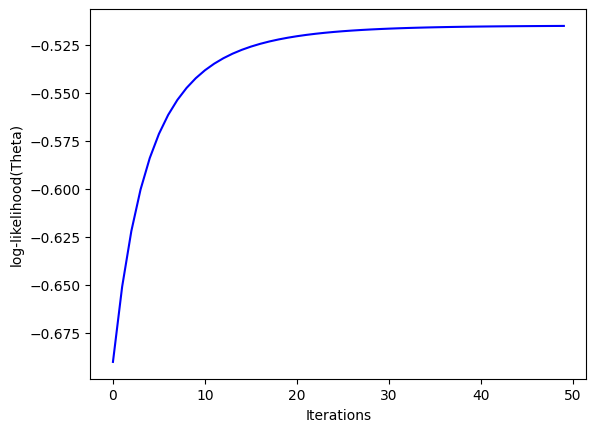

In [10]:
plt.plot(range(len(log_l_history)), log_l_history, "b")
plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")

Plot the data and the decision boundary:

(-2.4624306915019663, 2.5724825717974427)

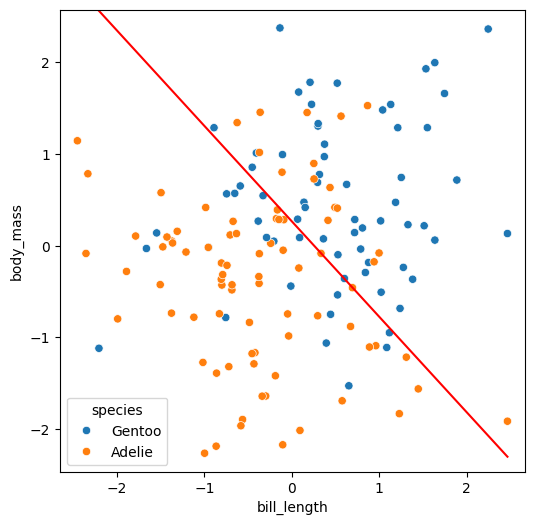

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X, x="bill_length", y="body_mass", hue=data["species"])

x_range = np.linspace(X['bill_length'].min(), X['bill_length'].max(), 100)
theta_final = model.parameters
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")

plt.xlim(X['bill_length'].min() - 0.2, X['bill_length'].max() + 0.2)
plt.ylim(X['body_mass'].min() - 0.2, X['body_mass'].max() + 0.2)

In [12]:
accuracy = ((model.predict(X) > 0.5) == y).mean()
print(f"Accuracy: {accuracy}")
assert accuracy > 0.6, "The accuracy is too low"

Accuracy: 0.7615894039735099


### **1.3: Report**

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule? 
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?
4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. When we use gradient ascent, we're trying to move uphill on the curve of our function, aiming to find a local maximum rather than a local minimum. This is because we want to maximize the likelihood that our model's parameters correctly fit the data.

2. In most machine learning problems, we often use gradient descent to minimize something, such as the cost or error. However, since our goal here is to maximize the likelihood of our model parameters, we instead use gradient ascent.

3. The variables $\alpha$ and the number of iterations influence the final result: we can observe that by choosing α equal to 0.5 and performing 50 iterations of gradient ascent, we have convergence to the optimal value for the log likelihood, which turns out to be -0.5500. This indicates that 50 iterations are sufficient when using a large enough learning rate, such as 0.5. However, if we keep the same number of iterations and decrease the value of the learning rate, which determines the magnitude of the shift, for example by using $\alpha$≤0.2, we can see from the log-likelihood trend that convergence is not achieved. Therefore, it is necessary to increase the number of iterations to observe the flattening of the curve.In conclusion, to achieve the optimal value of θ by gradient ascent (or gradient descent), it is important to use appropriate values of the parameters. By decreasing $\alpha$, it is necessary to increase the number of iterations, otherwise there is a risk of not reaching the optimal value because convergence is too slow. Regarding the effect on the boundary function, increasing the number of iterations while keeping $\alpha$ does not lead to improvements in the classification task, since as mentioned earlier, 50 iterations are sufficient to achieve convergence of the gradient ascent to the optimal value. Instead, if one of the two parameters is reduced while keeping the other unchanged, there is a marked deterioration in the accuracy of the boundary function, with an increase in the number of incorrectly classified points.

4. If the data features are not normalized—meaning they have vastly different scales (e.g., distances measured in kilometers and the number of rooms)—it can cause issues during gradient ascent. You might encounter errors like divisions by zero or even overflows in the sigmoid function's exponential component. The sigmoid function maps input features to probabilities, but if the input values are too large or small, the gradients can become unstable ("explode"), making it impossible to calculate the log likelihood and find the optimal parameter values for 
θ. Normalizing data ensures smoother and more stable gradient ascent optimization.


-------------------------------------------------------

## 2: **Polynomial Expansion**

### **2.1: Polynomial features for logistic regression** 

Define new features e.g., of 2nd and 3rd degree, and learn a logistic regression classifier by using the new features and the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

\begin{equation}
f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2
\end{equation}

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking $x$ and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$). 
In particular create `x_new_quad` by additionally stacking $x$ with the quadratic features, and `x_new_cubic` by additionally stacking $x$ with the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

<Axes: >

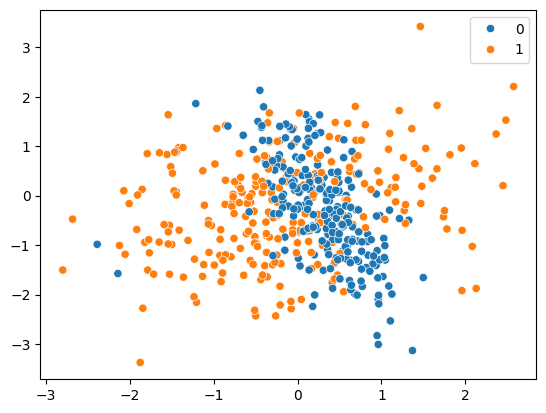

In [13]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=700,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=.3,
    random_state=89,
)
X = np.hstack([np.ones_like(X[:, [0]]), X])
X, X_val, y, y_val = train_test_split(X, y, test_size=200, random_state=42)

sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y)

In [ ]:
from itertools import combinations_with_replacement

def get_polynomial(X, degree):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.
    
    Args:
        X: the initial features matrix of shape (n_samples, n_features) where the first column can be the bias term
        degree: the degree of the polynomial (can be any positive integer)
    
    Returns:
        features: the final polynomial features matrix
    """
    if degree < 2:
        return X
    
    n_samples, n_features = X.shape
    features = X.copy()  # Start with the original features
    
    # For each degree from 2 to the specified degree
    for d in range(2, degree + 1):
        # Generate all possible combinations of features with replacement
        # For example, if d=2 and we have features [x1, x2], this will generate:
        # [(x1,x1), (x1,x2), (x2,x2)]
        combinations = list(combinations_with_replacement(range(n_features), d))
        
        # For each combination, compute the product of the features
        for combo in combinations:
            new_feature = np.ones(n_samples)
            for feature_idx in combo:
                new_feature *= X[:, feature_idx]
            features = np.column_stack((features, new_feature))
    
    return features


**Do not write below this line just run it**

--------------------------------------------

In [15]:
x_new_quad = get_polynomial(X, degree=2)
x_new_cubic = get_polynomial(X, degree=3)
print(x_new_quad.shape, x_new_cubic.shape)

(500, 9) (500, 19)


Now use the gradient ascent optimization algorithm to learn the models by maximizing the log-likelihood, both for the case of `x_new_quad` and `x_new_cubic`.


**Do not write below this line just run it**

--------------------------------------------

[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, 'Log Likelihood'),
 Text(0.5, 1.0, 'Log Likelihood History for Different Models')]

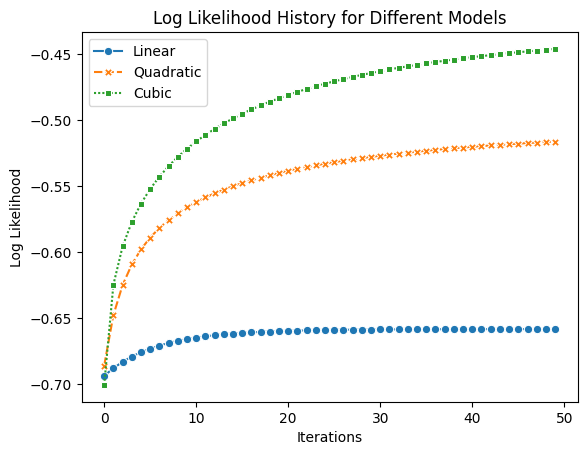

In [16]:
n_iter = 50
model_lin = LogisticRegression(num_features=X.shape[1])
log_l_history,_ = fit(model_lin, X, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic features
model_quad = LogisticRegression(num_features=x_new_quad.shape[1])
log_l_history_quad,_ = fit(model_quad, x_new_quad, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic and cubic features
model_cubic = LogisticRegression(num_features=x_new_cubic.shape[1])
log_l_history_cubic,_ = fit(model_cubic, x_new_cubic, y, lr=0.5, num_steps=n_iter)

log_l = np.stack([log_l_history, log_l_history_quad, log_l_history_cubic])

log_l_df = pd.DataFrame(log_l.T, columns=["Linear", "Quadratic", "Cubic"])
sns.lineplot(data=log_l_df, markers=True).set(
    xlabel="Iterations", ylabel="Log Likelihood", title="Log Likelihood History for Different Models"
)

### **2.2: Plot the computed non-linear boundary** 

First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

In [17]:
def boundary_function(x1_vec, x2_vec, theta_final, degree):
    """
    This function computes the boundary function for the given theta_final and degree.

    Args:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        theta_final: the final thetaa
        degree: the degree of the polynomial

    Returns:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        f: the boundary function
    """
    x1, x2 = np.meshgrid(x1_vec, x2_vec)

    
    x1 = x1.flatten().T
    x2 = x2.flatten().T
    bias = np.ones(x1.shape[0])
    
    

    X_big = np.column_stack((bias, x1, x2))
    

    features = get_polynomial(X_big, degree)
    #features = np.column_stack((np.ones(x1.shape[0]), features))
    # Compute the boundary function
    f = features @ theta_final
    

    return x1_vec, x2_vec, f

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

**Do not write below this line just run it**

--------------------------------------------

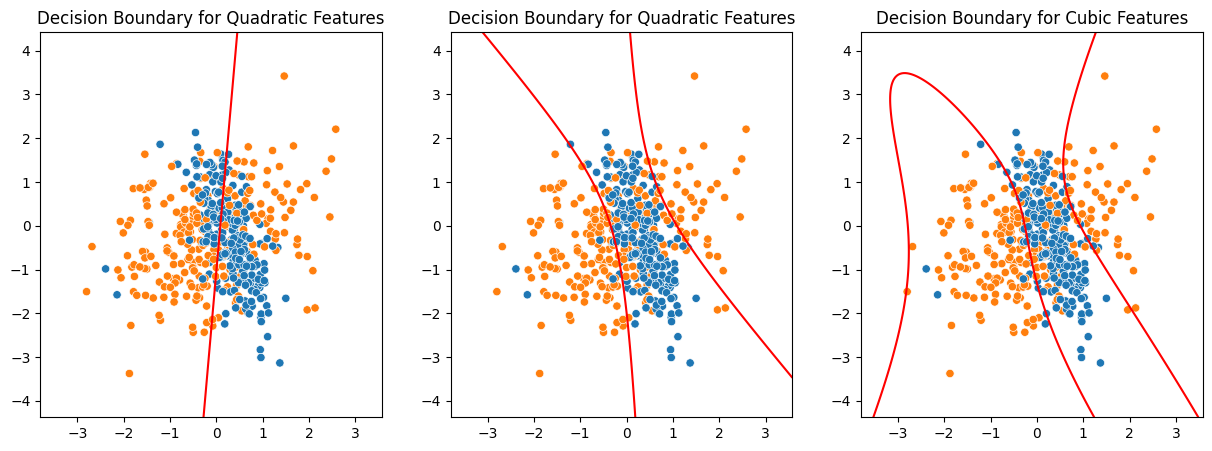

In [18]:
def plot_boundary_function(
    X: np.ndarray, y: np.ndarray, theta: np.ndarray, degree: int, n_points: int = 200
) -> None:
    """
    This function plots the boundary function for the given theta and degree.

    Args:
        X: the input data
        y: the input labels
        theta: the final theta
        degree: the degree of the polynomial
        n_points: the number of points to plot

    Returns:
        None
    """

    x1_vec = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, n_points)
    x2_vec = np.linspace(X[:, 2].min() - 1, X[:, 2].max() + 1, n_points)

    x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta, degree=degree)
    mesh_shape = int(np.sqrt(f.shape[0]))

    sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, legend=False)
    plt.contour(
        x1_vec, x2_vec, f.reshape((mesh_shape, mesh_shape)), colors="red", levels=[0]
    )

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_boundary_function(X, y, model_lin.parameters, degree=1)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,2)
plot_boundary_function(X, y, model_quad.parameters, degree=2)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,3)
plot_boundary_function(X, y, model_cubic.parameters, degree=3)
plt.title("Decision Boundary for Cubic Features");

**Polynomial degree and overfitting**

As the polynomial degree increases, the decision boundary becomes more and more complex. This can lead to overfitting, i.e. the model learns the training data too well, and it is not able to generalize to new data. This is a common problem in machine learning, and it is important to be able to detect it.

In order to detect overfitting, we can split the dataset into a training set and a test set. The training set is used to learn the model, while the test set is used to evaluate the model performance on new data. If the model performs well on the training set, but it performs poorly on the test set, then we have overfitting.

In this exercise, you are asked to plot the training and test accuracy as a function of the polynomial degree. Consider all the polynomial degrees from 1 to 20. For each polynomial degree, learn the model on the training set, and evaluate the accuracy on both the training and the test set. Additionally, visualize the decision boundary for the polynomials that give the **best** and the **worst** test accuracy for $\texttt{degree} \geq 2$.

In [19]:
from sklearn.preprocessing import normalize

def fit_polynomials(X, y, X_test, y_test, degrees, lr, num_steps, architecture = LogisticRegression):
    """
    This function fits a logistic regression model for each degree in the degrees list.
    """
    X = normalize(X)
    X_test = normalize(X_test)

    thetas = []
    accuracy_scores_train, accuracy_scores_test = [], []
    for degree in tqdm(degrees):
        x_new = get_polynomial(X, degree=degree)

        model = architecture(num_features=x_new.shape[1])
        fit(model, x_new, y, lr=lr, num_steps=num_steps)    

        thetas.append(model.parameters)
        y_hat_train = model.predict(x_new) > 0.5
        accuracy_scores_train.append(accuracy_score(y, y_hat_train))
        y_hat_test = model.predict(get_polynomial(X_test, degree=degree)) > 0.5
        accuracy_scores_test.append(accuracy_score(y_test, y_hat_test))
        
    return thetas, accuracy_scores_train, accuracy_scores_test

100%|██████████| 19/19 [00:09<00:00,  1.93it/s]


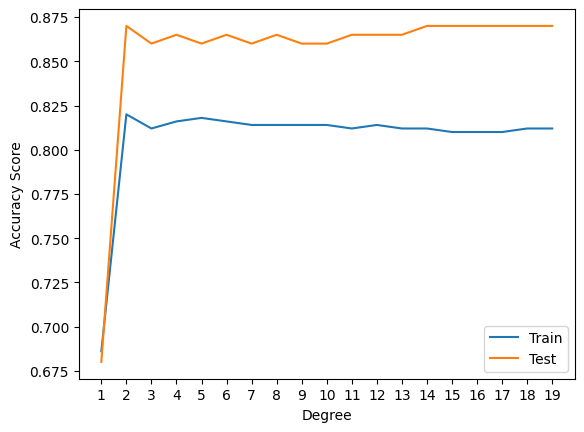

In [20]:
degrees = np.arange(1, 20)
np.random.seed(42)
thetas, accuracy_scores_train, accuracy_scores_test = fit_polynomials(
    X, y, X_val, y_val, degrees=degrees, lr=0.5, num_steps=500, architecture=LogisticRegression
)
sns.lineplot(x=degrees, y=accuracy_scores_train, label="Train")
sns.lineplot(x=degrees, y=accuracy_scores_test,  label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy Score")
plt.xticks(degrees)
plt.show()

Plot the best and the worst decision boundaries for $\texttt{degree} \geq 2$.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

Text(0.5, 1.0, 'Worst Decision Boundary, degree: 3')

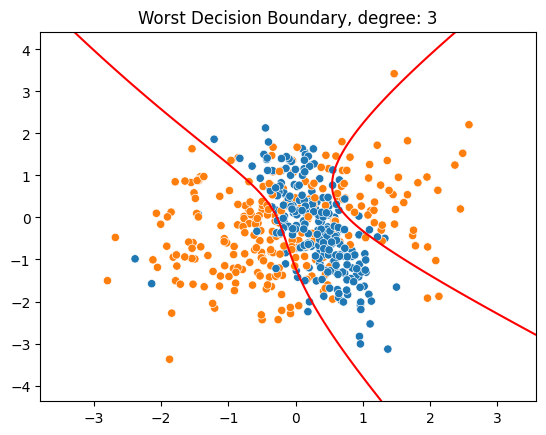

In [21]:
# Plot worst model
i = np.argmin(accuracy_scores_test[1:])+1
plot_boundary_function(X, y, thetas[i], degrees[i])
plt.title("Worst Decision Boundary, degree: " + str(degrees[i]))

Text(0.5, 1.0, 'Best Decision Boundary, degree: 2')

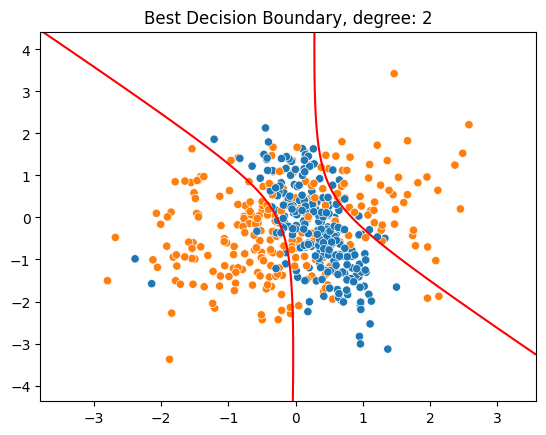

In [22]:
# Plot best model
i = np.argmax(accuracy_scores_test[1:])+1
plot_boundary_function(X, y, thetas[i], degrees[i])
plt.title("Best Decision Boundary, degree: " + str(degrees[i]))

#### **Report** 
Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer. 
3. In general what are some properties of the dataset that makes it more prone to overfitting? Discuss their impact.


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. As the degree of the polynomial increases, the decision boundary becomes more articulated. For this dataset, the quadratic decision boundary achieves the best balance between complexity and classification performance. 
Beyond the quadratic polynomial, the performance generally decreases, although small fluctuations may result in slight improvements at higher polynomial degrees. 
No, you cannot incur underfitting by increasing the polynomial degree; instead, you are more likely to face overfitting.
2. Interestingly, the test accuracy is higher than the training accuracy in this case. 
The difference between the best and worst test accuracy is significant because the linear polynomial is too simplistic compared to higher-degree models. However, for polynomials of degree greater than one, the accuracy tends to remain relatively consistent. 
In our setup, we did not explore very high-degree polynomials, but lower-degree polynomials generally perform better and are more generalizable, aligning with the principle of Occam's Razor.
3. Datasets are more prone to overfitting when they have high dimensionality (many features relative to samples), small sample size (leading to memorization rather than generalization), noisy data (causing the model to fit random variations instead of true patterns), and complex patterns (encouraging overly intricate solutions, especially with high polynomial degrees or model complexity).

-------------------------------------------------------

### **2.4: Weight Penalization**

Look at how complicated the decision boundaries become as you increase the degree. Can we improve this and prevent overfitting?
When dealing with overfitting one frequent solution is to use a weigth penalization technique like L2 or L1 penalization. 

In our case we'll use L2 regularization. In this way the regularized likelihood will be:
$$
\texttt{Likelihood}_{reg}(\theta) = \texttt{Likelihood}(\theta) - \frac{\lambda}{2n} \sum^n_i \theta_i^2
$$
Thus we can derive the update rule as:
\begin{equation}
\theta_j:= \theta_j + \alpha( \frac{\partial l(\theta_j)}{\partial \theta_j} -  \frac{\partial}{\partial \theta_j} \left( \frac{\lambda}{2} \theta_j^2 \right ) )
\end{equation}

Calculating the second term of the update rule it's just a matter of analytically solving a simple gradient, do it, and then implement it by extending the `LogisticRegression` class:

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression_penalized.py`**

--------------------------------------------

In [23]:
from libs.models import LogisticRegressionPenalized

(200,)


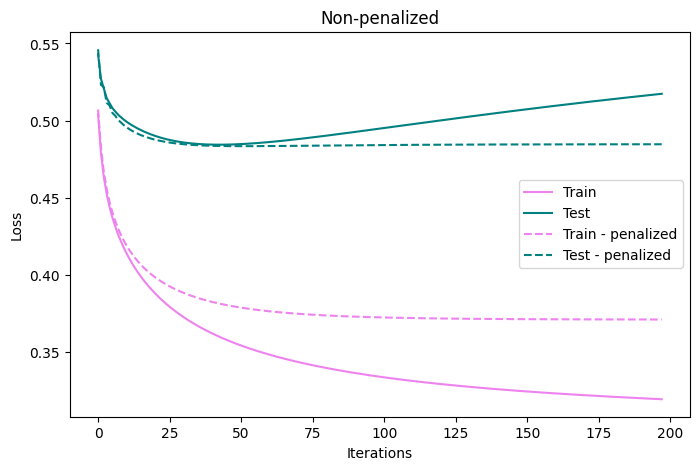

In [24]:
X,y = make_classification(
    n_samples=500, 
    n_features=100, 
    n_informative=50, 
    n_redundant=25, 
    n_classes=2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
np.random.seed(42)

lr = LogisticRegression(X.shape[1])
likelihood_history, val_loss_history = fit(lr, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

penalized_lt = LogisticRegressionPenalized(X.shape[1], 2)
pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)
print(pen_val_history.shape)
plt.figure(figsize=(8, 5))
plt.plot(-likelihood_history[2:], label="Train", color="violet")
plt.plot(val_loss_history[2:], label="Test", color='teal')
plt.plot(-pen_history[2:], label="Train - penalized", color="violet", linestyle="--")
plt.plot(pen_val_history[2:], label="Test - penalized", color="teal", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Non-penalized")
plt.legend()

Now, evaluate the Penalized Logistic Regression for each value of $\lambda \in [0,3]$ and find the one that performs the best: 

Best lambda: 1.4000000000000001


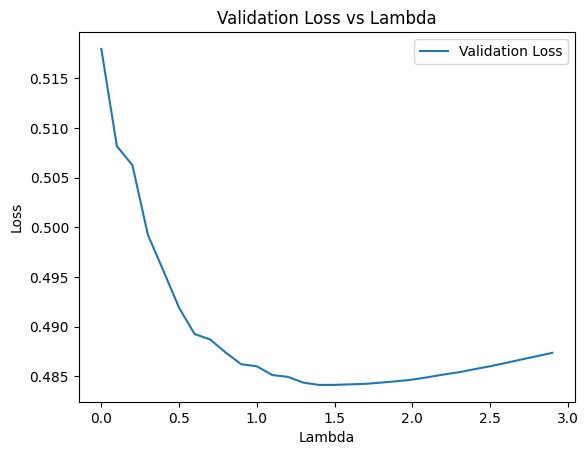

In [25]:
from libs.optim import fit
lambdas = np.arange(0, 3, 0.1)
losses = []

for lambda_ in lambdas:
    #your code in your loop 
    penalized_lt = LogisticRegressionPenalized(X.shape[1], lambda_)
    pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)
    losses.append(pen_val_history[-1])
    
    pass

if len(losses) > 0:
    sns.lineplot(x=lambdas, y=losses, label="Validation Loss").set(
        xlabel="Lambda", ylabel="Loss", title="Validation Loss vs Lambda"
    )
    print(f"Best lambda: {lambdas[np.argmin(losses)]}")

#### Report
Write now your considerations. In particular:
1. What happens when we use a non-penalized logistic regression?
2. Observe the plot of the Train and Validation losses in the penalized vs non penalized case. In which case is the Train loss better? Can you explain why?
3. What is the convergence rate? How is it influenced by the penalization?

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1.When using non-penalized logistic regression, the train loss stabilizes earlier compared to the penalized case. However, the non-penalized test loss increases beyond a certain point, indicating overfitting as the model becomes too complex. In contrast, penalization helps control model complexity, ensuring that both train and test losses stabilize even for higher polynomial degrees, reducing the risk of overfitting.

2.The train loss is better (i.e., lower) in the non-penalized case due to overfitting. This improvement in train loss does not translate to better performance on the test data; instead, the test loss worsens. Penalization prevents this by balancing the model's fit on the training data and its generalization to unseen data.

3.The convergence rate refers to how quickly the optimization algorithm minimizes the loss function. Penalization slows down convergence because it adds a regularization term, making the optimization problem more constrained. While non-penalized models may converge faster, they risk overfitting, whereas penalized models ensure better generalization by balancing model complexity.

-------------------------------------------------------

## 3: **Multinomial Classification**

### **3.1: Softmax Regression Model**

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K. 
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*. 
In the first of this exercise we have to: 
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples 
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

--------------------------------------------
**Write you equation below this line**

--------------------------------------------

\begin{align*}
L(\theta) = −log(pi,yi​​)
\end{align*}

\begin{align*}
L(\theta) = -\frac{1}{N}\sum_{i=1}^N \log\left(\frac{\exp(X_i \theta_{y_i})}{\sum_{j=1}^K \exp(X_i \theta_j)}\right)
\end{align*}



\begin{align*}
\nabla_{\theta_k} L(\theta) = \frac{1}{N}\sum_{i=1}^N X_i^T(p_{ik} - \mathbb{1}[y_i = k])
\end{align*}


### **3.2: Coding**

We are using the CIFAR-10 dataset for this exercise. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It has 50,000 training images and 10,000 test images. The dataset was established by the Canadian Institute For Advanced Research (CIFAR), and it has become a standard benchmark for machine learning algorithms, especially in the area of image classification.

In [26]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

cifar_dir = "assets/cifar10"
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.CIFAR10(
    root=cifar_dir, train=True, download=True, transform=transform
)
test_data = datasets.CIFAR10(
    root=cifar_dir, train=False, download=True, transform=transform
)

# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        encoded[i, val] = 1
    return encoded

# Evaluate the accuracy of the predictions
def compute_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions

# Preprocess the data
X_train = [img.reshape(-1).numpy() for img, _ in train_data]
X_train = np.array(X_train)
y_train = [label for _, label in train_data]

X_val = [img.reshape(-1).numpy() for img, _ in test_data]
X_val = np.array(X_val)
y_val = [label for _, label in test_data]


# Add bias term to X
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_val)

Files already downloaded and verified
Files already downloaded and verified


*Hint: consider the labels as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).*

Now implement a classifier for Multinomial Classification using the `softmax` function. Again, implement it as a class with the methods:
- `predict`
- `predict_labels`
- `likelihood` *(Here you need to implement the Cross Entropy Loss)*
- `update_theta`
- `compute_gradient` to compute the Jacobian $\nabla$

Note that this this you don't need to reimplement the `fit()` function since the training loop you defined above works also for a Multinomial Classifier, provided that this is structured with the previously mentioned methods.

--------------------------------------------

**Fill in the code in `libs/models/multinomial.py` and `libs/math.py/softmax()`**

--------------------------------------------

In [27]:
from libs.models import SoftmaxClassifier
from libs.optim import fit

--------------------------------------------

**Do not write below this line just run it**

--------------------------------------------

*Execution can take around 10 minutes*

In [28]:
# Apply gradient descent to optimize theta
alpha = 0.01
iterations = 500
H, K = X_train.shape[1], 10  # number of features and number of classes
model = SoftmaxClassifier(num_features=H, num_classes=K)
loss_history, _ = fit(model, X_train, y_train_onehot, lr=alpha, num_steps=iterations)

# Make predictions on the training and test data
train_predictions = model.predict_labels(X_train)
test_predictions = model.predict_labels(X_val)

train_accuracy = compute_accuracy(train_predictions, y_train)
test_accuracy = compute_accuracy(test_predictions, y_val)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

c:\Users\rotellini9809\Desktop\Homework02\libs\models\multinomial.py:71: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(y_onehot * np.log(preds), axis=1))
c:\Users\rotellini9809\Desktop\Homework02\libs\models\multinomial.py:91: RuntimeWarning: invalid value encountered in subtract
  self.parameters -= lr * gradient
c:\Users\rotellini9809\Desktop\Homework02\libs\models\multinomial.py:71: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(np.sum(y_onehot * np.log(preds), axis=1))


Training accuracy: 10.00%
Test accuracy: 10.00%


### **3.3: Pipeline**
Now you're going to use `scikit-learn` library to build a pipeline of operations to redo everything we've done so far in the homework. First we have loaded the required modules and the penguins dataset.

---

Then here you'll build the pipeline. We need four items:
1. The Numerical Transformer, to handle the preprocessing of numerical columns, by:
    - Imputing missing values with their mean
    - Enrich the features with a 3-rd degree polynomial expansion
    - Scaling of the features to $\mu=0, \sigma=1$
2. The Categorical Transformer, to handle the preprocessing of categorical values, by:
    - Imputing the missing values with the most frequent value
    - Encode the features in a one-hot vector.
3. The Preprocessor: a ColumnTransformer that distributed the numerical columns to the numerical transformer and the categorical columns to the categorical tranformer.
4. The final Pipeline, which contains the preprocessor and the classfier of your choice (in this case `KNeighborsClassifier`)

In [29]:
data = pd.read_csv('assets/train.csv')

X_train, X_val, y_train, y_val = train_test_split(data.drop('species', axis=1), data.species, test_size=0.2, random_state=42)

In [30]:
numerical_cols = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']
categorical_cols = ['island', 'sex']

##############################################
###          FILL IN THIS CODE           #####
##############################################
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
## Import everything you need here

numeric_transformer = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()
)

categoric_transfomer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore')
)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categoric_transfomer, categorical_cols)
], remainder='drop')

pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=5))
if len(pipe.named_steps)>0:
    display(pipe)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['bill_length', 'bill_depth',
                                                   'flipper_length',
                                                   'body_mass']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['island', 'sex'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Now, we can use this pipeline to preprocess the input data and fit a classifier. Leveraging `scikit-learn`'s pipelines allows you to:
- Define the entire chain of operations in a structured way, which is especially useful for cleaning and transforming data.
- Separate the definition of operations from their execution, creating a clean and organized workflow.

This approach makes it easier to manage complex preprocessing steps while maintaining readability and clarity in your code.

In [31]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.82      0.70      0.76        20
   Chinstrap       0.78      0.78      0.78         9
      Gentoo       0.73      0.92      0.81        12

    accuracy                           0.78        41
   macro avg       0.78      0.80      0.78        41
weighted avg       0.79      0.78      0.78        41



This is nice but can we improve it? In defining the pipeline you certainly used some fixed hyperparameters, for example the number of neighbors or the degree of the polynomial expansion.

First, let's look at the list of hyperparameters: 

In [32]:
hparams = pipe.get_params()
for hp, val in hparams.items():
    if type(val) not in [int, float, str]:
        continue
    print(f"{hp}: {val}")

columntransformer__remainder: drop
columntransformer__sparse_threshold: 0.3
columntransformer__num__simpleimputer__missing_values: nan
columntransformer__num__simpleimputer__strategy: mean
columntransformer__cat__simpleimputer__missing_values: nan
columntransformer__cat__simpleimputer__strategy: most_frequent
columntransformer__cat__onehotencoder__categories: auto
columntransformer__cat__onehotencoder__feature_name_combiner: concat
columntransformer__cat__onehotencoder__handle_unknown: ignore
columntransformer__cat__onehotencoder__sparse: deprecated
kneighborsclassifier__algorithm: auto
kneighborsclassifier__leaf_size: 30
kneighborsclassifier__metric: minkowski
kneighborsclassifier__n_neighbors: 5
kneighborsclassifier__p: 2
kneighborsclassifier__weights: uniform


Some of these hyperparameters are set to their default values, while others are explicitly defined. However, any data scientist knows that hyperparameters should not be arbitrarily chosen; instead, they should be optimized through **Cross-Validation**.

We can leverage the compositionality of `scikit-learn` by incorporating the pipeline into a `GridSearchCV` class. This allows you to easily define a grid of parameters to val and automatically perform cross-validation over the combinations.

Choose at least 2 values for at least 3 hyperparameters. val their impact on the model and find the best combination.

In [33]:
from sklearn.model_selection import GridSearchCV

grid = dict(
    kneighborsclassifier__n_neighbors=[3, 5, 7,9],
    kneighborsclassifier__leaf_size=[10, 30, 50],
    kneighborsclassifier__p=[1, 2,3],
    kneighborsclassifier__weights=['uniform', 'distance']
)

pipe_cv = GridSearchCV(pipe, grid, cv=5, n_jobs=-1, verbose=1)
if pipe_cv is not None:
    pipe_cv.fit(X_train, y_train)

    print(f"Best score: {pipe_cv.best_score_}")
    for hp, val in pipe_cv.best_params_.items():
        print(f"{hp}: {val}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best score: 0.8257575757575758
kneighborsclassifier__leaf_size: 10
kneighborsclassifier__n_neighbors: 7
kneighborsclassifier__p: 1
kneighborsclassifier__weights: uniform


`GridSearchCV` doesn't only find the best combination of hyperparmeters, but it also refits the model with the best hyperparameters it finds. Let's val this new model:

In [34]:
y_pred = pipe_cv.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.85      0.55      0.67        20
   Chinstrap       0.64      0.78      0.70         9
      Gentoo       0.71      1.00      0.83        12

    accuracy                           0.73        41
   macro avg       0.73      0.78      0.73        41
weighted avg       0.76      0.73      0.72        41



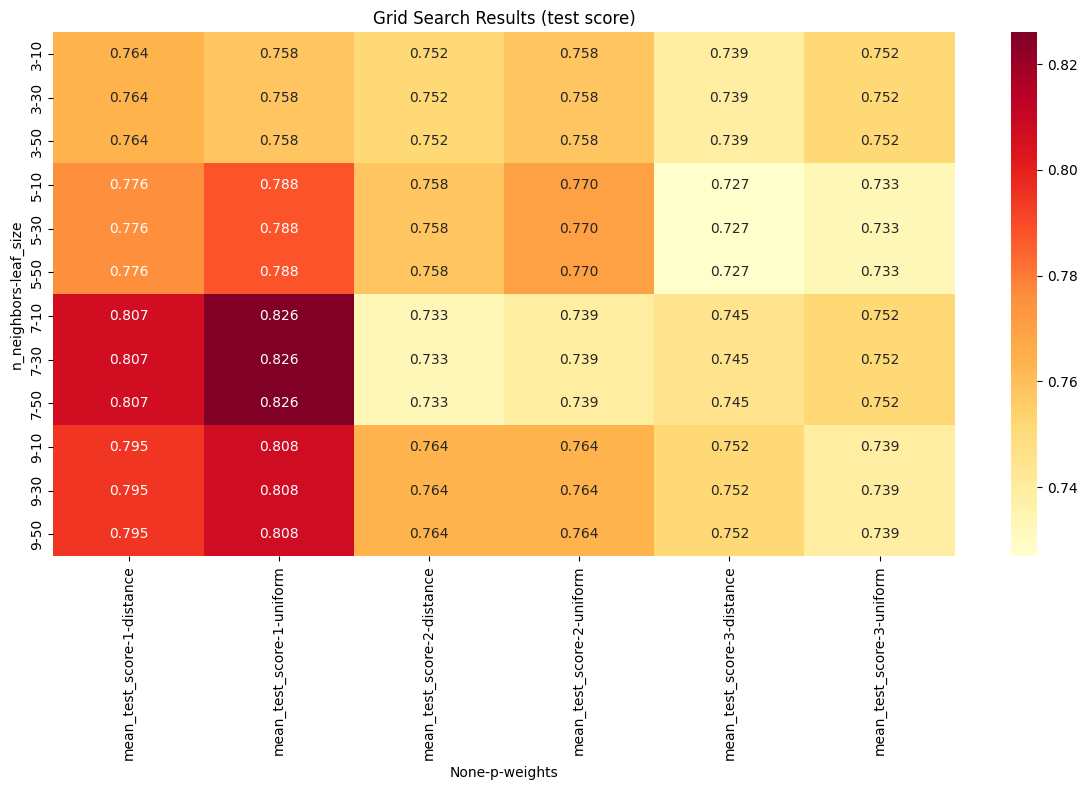

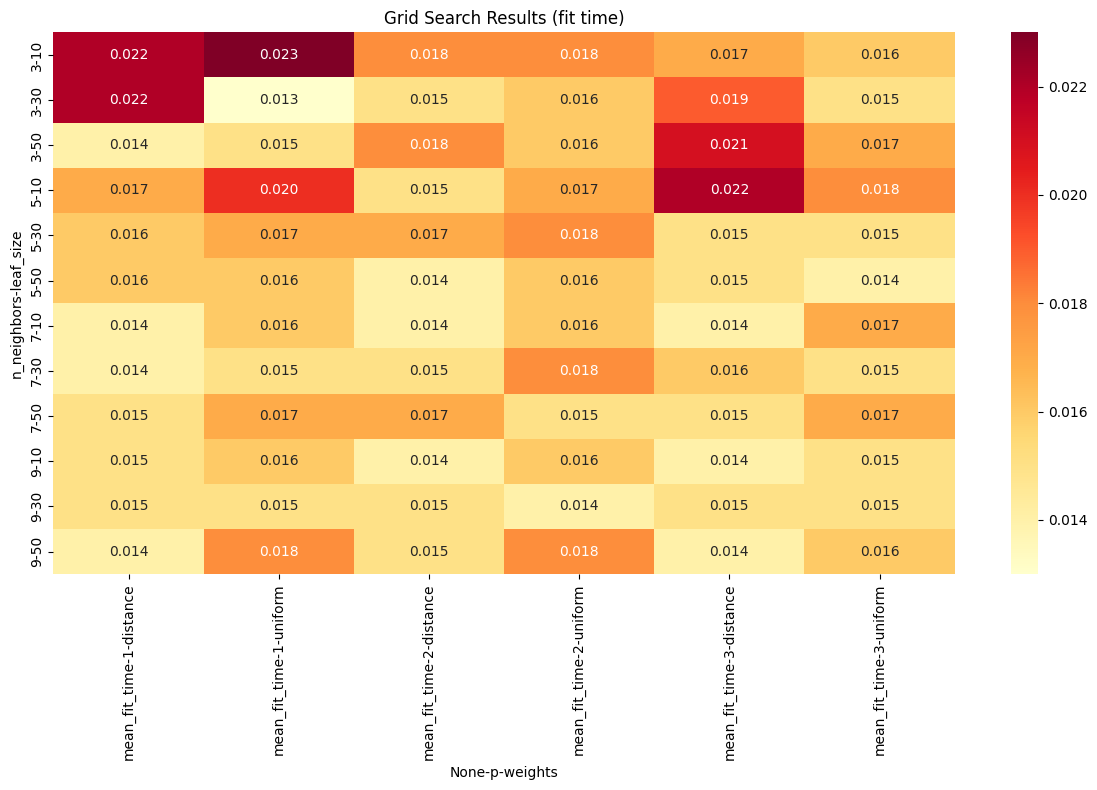

In [35]:
from libs.optim import fit

cv_res = pd.DataFrame(pipe_cv.cv_results_)
cv_res.columns = [col.split('__')[-1] for col in cv_res.columns]

##############################################
###                YOUR CODE HERE         ####
##############################################
def plot_grid_search_heatmap(cv_results, grid_params,fit_time=False):
    # Get active parameters (not commented out)
    active_params = {k: v for k, v in grid_params.items() if not k.startswith('#')}
    param_names = [p.split('__')[-1] for p in active_params.keys()]
    n_params = len(param_names)
    
    if n_params < 2:
        raise ValueError('Grid search heatmap requires at least two parameters')
    
    values = ['mean_fit_time'] if fit_time else ['mean_test_score']
    
    n_index = n_params // 2
    index_params = param_names[:n_index]
    columns_params = param_names[n_index:]
    
    scores_matrix = cv_results.pivot_table(
        values=values,
        index=index_params,
        columns=columns_params
    ).round(3)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(scores_matrix, annot=True, cmap='YlOrRd', fmt='.3f')
    
    title = 'Grid Search Results (fit time)' if fit_time else 'Grid Search Results (test score)'
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Usage
plot_grid_search_heatmap(cv_res, grid, fit_time=False)
plot_grid_search_heatmap(cv_res, grid, fit_time=True)

#### Report
1. How many combinations has your gridsearch tried?
2. Make a plot with the results of your hyperparameter grid
3. Do you notice any trend in the performance of certain hyperparameters?
4. Do the classifiers obtain the same accuracy on train and val sets? If not, try to give an explanation.
5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.

--------------------------------------------

**Write your answer below this line**

1. Fitting 5 folds for each of 72 candidates, totalling 360 fits
2. ===Grid Seach results=== 
3. There seems to be an optimal region in the hyperparameter space, furthermore combining multiple parameter values seem to preserve linearity wrt performance of single parameter value:
certain paramenter values improve or decrease performance regardless of combination of parameters.
4. Generally not, an overfit classifier tends to remember the test set instead of learning a generalized model, therefore is scores lower on instances it has not seen in the test set.
5. The grid seach yields the model fitted with the optimal parameters ranges it has found with no regard to fit time, however fit time is stored for further evaluation, in the heatmap, one can cleary note that fit time does not scale with performance.

--------------------------------------------

## **4: Debugging a CNN with Shape Errors**

You are provided with a CNN model intended to classify images from the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. However, the model contains shape mismatches between layers due to intentional errors. Your first task is to identify and fix these errors to make the model functional.*testo in corsivo*

In [36]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


### 4.1: Split the CIFAR-10 Dataset

Instructions:

* Define the Split Sizes:
Calculate the sizes for the training and validation datasets. Allocate ***80% of the training*** data for the training set and *20% for the validation set*.

* Split the Dataset:
Use `torch.utils.data.random_split` to create the training and validation datasets from the original training dataset.

* Create Data Loaders:
Create data loaders for the training, validation, and test datasets using torch.utils.data.DataLoader with a ***batch size of 64***. Ensure that the training data is ***shuffled***.

* Print the size of each dataset (train, test, val)

In [37]:
# Define transformations for the data that we will use
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split the training dataset into 80% training and 20% validation
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# use these names for the data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### 4.2: Identify and Correct Errors in the CNN Model


In this exercise, you will analyze an intentionally incorrect implementation of a Convolutional Neural Network model. Your task is to identify the errors in the `PoorPerformingCNN` class and correct them to ensure the model works properly for the CIFAR-10 dataset.

--------------------------------------------

**Fill in the code in `libs/models/poor_cnn.py**

--------------------------------------------

In [38]:
from libs.models import PoorPerformingCNN

net = PoorPerformingCNN()

Loss Function and optimizer

In [39]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 4.3: Training procedure

In this exercise, you will complete the training and validation loop of a neural network model. Your task is to compute and store the average training loss, average validation loss, and the corresponding accuracies for each epoch.

Instructions:

* **Training Phase**:
After computing the average training loss (avg_train_loss), you need to calculate the training accuracy based on the model's predictions and append the calculated training accuracy to the train_accuracies list.

* **Validation Phase**:
After calculating the average validation loss (avg_val_loss), you need to calculate the validation accuracy based on the validation dataset and append the calculated validation accuracy to the val_accuracies list. (the same as befor but for the val)

In [40]:
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


num_epochs = 10
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        #print(inputs.shape, labels.shape)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        #print(outputs.shape)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################
    
    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches 
    train_losses.append(avg_train_loss)
    
    # Calculate training accuracy
    _, y_pred = torch.max(outputs, 1)
    train_accuracy = (y_pred == labels).float().mean().item()
    train_accuracies.append(train_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Calculate accuracy
            _, val_predicted = torch.max(val_outputs.data, 1)
            total += val_labels.size(0)
            correct += (val_predicted == val_labels).sum().item()


    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Calculate validation accuracy
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Finished Training')


Epoch 1, Average Training Loss: 1.9268, Training Accuracy: 0.3750
Epoch 1, Average Validation Loss: 1.6678, Validation Accuracy: 0.4116
Epoch 2, Average Training Loss: 1.6195, Training Accuracy: 0.3594
Epoch 2, Average Validation Loss: 1.5785, Validation Accuracy: 0.4392
Epoch 3, Average Training Loss: 1.5596, Training Accuracy: 0.4844
Epoch 3, Average Validation Loss: 1.5376, Validation Accuracy: 0.4571
Epoch 4, Average Training Loss: 1.5196, Training Accuracy: 0.5000
Epoch 4, Average Validation Loss: 1.5127, Validation Accuracy: 0.4634
Epoch 5, Average Training Loss: 1.4869, Training Accuracy: 0.4844
Epoch 5, Average Validation Loss: 1.4954, Validation Accuracy: 0.4652
Epoch 6, Average Training Loss: 1.4572, Training Accuracy: 0.4531
Epoch 6, Average Validation Loss: 1.4456, Validation Accuracy: 0.4875
Epoch 7, Average Training Loss: 1.4289, Training Accuracy: 0.3281
Epoch 7, Average Validation Loss: 1.4394, Validation Accuracy: 0.4899
Epoch 8, Average Training Loss: 1.4040, Training

### 4.4: Evaluate

In [41]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        #####################################################
        ##              YOUR CODE HERE                     ##
        #####################################################

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        #####################################################
        ##              END OF YOUR CODE                   ##
        #####################################################

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 51.48%


### 4.5: Report

1. What challenges can class imbalance introduce when training a machine learning model?

2. What are some strategies to address class imbalance in your dataset or training process?

3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance

4. Is the cifar-10 and imbalanced dataset? plot the number of samples for each classes inside the cifar 10 dataset.

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. Class imbalance in a dataset can introduce different challenges when training a machine learning model. When one class significantly outnumbers the others, the model may become biased towards predicting the majority class. This can lead to high accuracy rates for the dominant class but poor performance on the minority classes, which are often of more interest. This imbalance can affect the model’s ability to generalize, making it perform well only on the majority class and ignoring the subtleties in underrepresented classes. Consequently, the model may fail to capture important patterns in the minority classes.

2. To address class imbalance, different strategies can be employed at different stages of the machine learning pipeline. One common approach is data resampling, which includes methods such as oversampling the minority class, undersampling the majority class, or generating synthetic samples. Alternatively, assigning class weights in the loss function can signal to the model that certain classes need more attention, which can help reduce the influence of the majority class during training. Other tecniques can be data augmentation on the minority class.

3. In the presence of class imbalance, accuracy alone can be a misleading performance measure. High accuracy can often mask poor performance on minority classes, as the model may still correctly predict the majority class most of the time while failing to capture minority class patterns. This could result in a model with high overall accuracy but with poor recall or precision for the underrepresented classes, making it unsuitable for real-world use cases where each class might be critical. For example, in a medical diagnosis application, correctly identifying a rare disease is vital, and a model that fails to do so could be potentially harmful despite its high accuracy. Therefore, in cases of class imbalance, using metrics like F1-score, precision, recall, or confusion matrices provides a more accurate picture of model performance.

4. CIFAR-10 is not an imbalanced dataset; it contains an equal number of samples for each class, making it a balanced dataset. Each class contains exactly 5,000 training images, making it ideal for training models without worrying about class imbalance.
-------------------------------------------------------

## **5: Improve the accuracy** (BONUS)

### 5.1: Custom model

After successfully debugging the model, you'll notice that the accuracy on the CIFAR-10 dataset is only around 50-60%. Your second task is to improve the model's performance.

How?

*   Add more convolutional layers to capture higher-level features.
*   Use Batch Normalization
*   Add Dropout Layers

Data Augmentation:
*   Apply transformations like random cropping, flipping, and rotation.

Hint: You CAN implement already pre-existing CNN architectures (do your research). As long as it is a CNN everything is fine.

By the end of this section you should return the accuracy of your model on the test dataset.

NB: by better score we mean at least +10% with respect to the previous model.





In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F


# Define comprehensive data augmentation transformations
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # Random crop with padding
    transforms.RandomHorizontalFlip(),     # Random horizontal flip
    transforms.RandomRotation(10),         # Random rotation up to 10 degrees
    transforms.ToTensor(),                 # Convert to tensor
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # Normalize with CIFAR-10 mean and std
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)


# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


--------------------------------------------

**Fill in the code in `libs/models/custom_cnn.py**

--------------------------------------------

In [43]:

from libs.models import CustomCNN

net = CustomCNN().to(device)

#### Training

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')


Epoch 1, Loss: 1.5368
Epoch 2, Loss: 1.2177
Epoch 3, Loss: 1.1039
Epoch 4, Loss: 1.0215
Epoch 5, Loss: 0.9726
Epoch 6, Loss: 0.9249
Epoch 7, Loss: 0.8855
Epoch 8, Loss: 0.8447
Epoch 9, Loss: 0.8224
Epoch 10, Loss: 0.7990
Finished Training


#### Evaluation

In [45]:
# Evaluate the model
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 79.16%



### 5.2: Pretrained network
In this exercise, you will start from scratch to adapt a pre-trained AlexNet model for the CIFAR-10 dataset.

Instructions

- Use torchvision.models to load a pre-trained AlexNet. Be sure to specify that the model should be pre-trained on ImageNet.

- The CIFAR-10 dataset has 10 classes, so you need to update the model’s final layer to output 10 classes instead of the default 1000.

- Replace the final fully connected layer in AlexNet’s classifier to output 10 classes.

- To perform fine-tuning, freeze all layers except the newly added fully connected layer.

- Move your model to the appropriate device (cuda if available). Define a device and ensure the model is moved to that device.


In [46]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [47]:
from torchvision import models

# Load pre-trained AlexNet
model = models.alexnet(pretrained=True)

# Freeze all layers except the final layer
for param in model.parameters():
    param.requires_grad = False

# Modify the final fully connected layer to output 10 classes for CIFAR-10
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)

# Enable gradient computation for the final layer
for param in model.classifier[6].parameters():
    param.requires_grad = True


model = model.to(device)

c:\Users\rotellini9809\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rotellini9809\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Epoch 1, Loss: 0.7217
Finished Training
Accuracy on the test images: 81.61%
